## 1. Focus on the stock you pick and their competitors. Report summary statistics of the training period you select and plot the kernel density.

In [2]:
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas_datareader as web
import warnings
warnings.filterwarnings('ignore')

In [12]:
import yfinance as yf

start_date = datetime(2013,4,1)
end_date = datetime(2023,4,1)

gs = yf.download('GS', start = start_date,
                   end = end_date)
jpm  = yf.download('JPM', start = start_date,
                   end = end_date)
ms = yf.download('MS', start = start_date,
                   end = end_date)
c = yf.download('C', start = start_date,
                   end = end_date)
bac = yf.download('BAC', start = start_date,
                   end = end_date)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MAX VALUES OF  GS: OPEN, HIGH, CLOSE, VOL (Apr, 2013 - Apr, 2023)

In [16]:
gs.idxmax()

Open        2021-11-03
High        2021-11-02
Low         2021-10-26
Close       2021-11-02
Adj Close   2021-11-02
Volume      2013-09-20
Year        2023-01-03
dtype: datetime64[ns]

MIN VALUES OF GS: OPEN, HIGH, CLOSE, VOL (Apr, 2013 - Apr, 2023)

In [17]:
gs.idxmin()

Open        2020-03-23
High        2013-04-19
Low         2020-03-19
Close       2020-03-23
Adj Close   2013-04-18
Volume      2019-12-24
Year        2013-04-01
dtype: datetime64[ns]

##Total Volume Trade by Year for GS

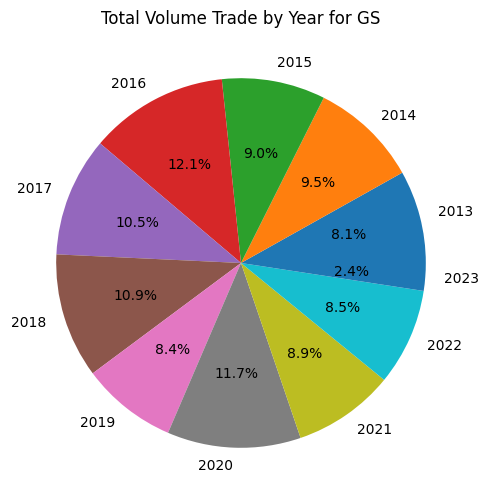

In [13]:
gs['Year'] = gs.index.year
total_volume_by_year = gs.groupby('Year')['Volume'].sum()
plt.figure(figsize=(8, 6))
plt.pie(total_volume_by_year, labels=total_volume_by_year.index, autopct='%1.1f%%')
plt.title('Total Volume Trade by Year for GS')
plt.show()


##Goldman Sach (GS) competitors are:

##1. JPMorgan Chase (JPM)
##2. Morgan Stanley (MS)
##3. Citigroup (C)
##4. Bank of America (BAC)

##Close Price of GS and Competitor Stock

Text(0.5, 1.0, 'Close Price of GS and Competitor Stock')

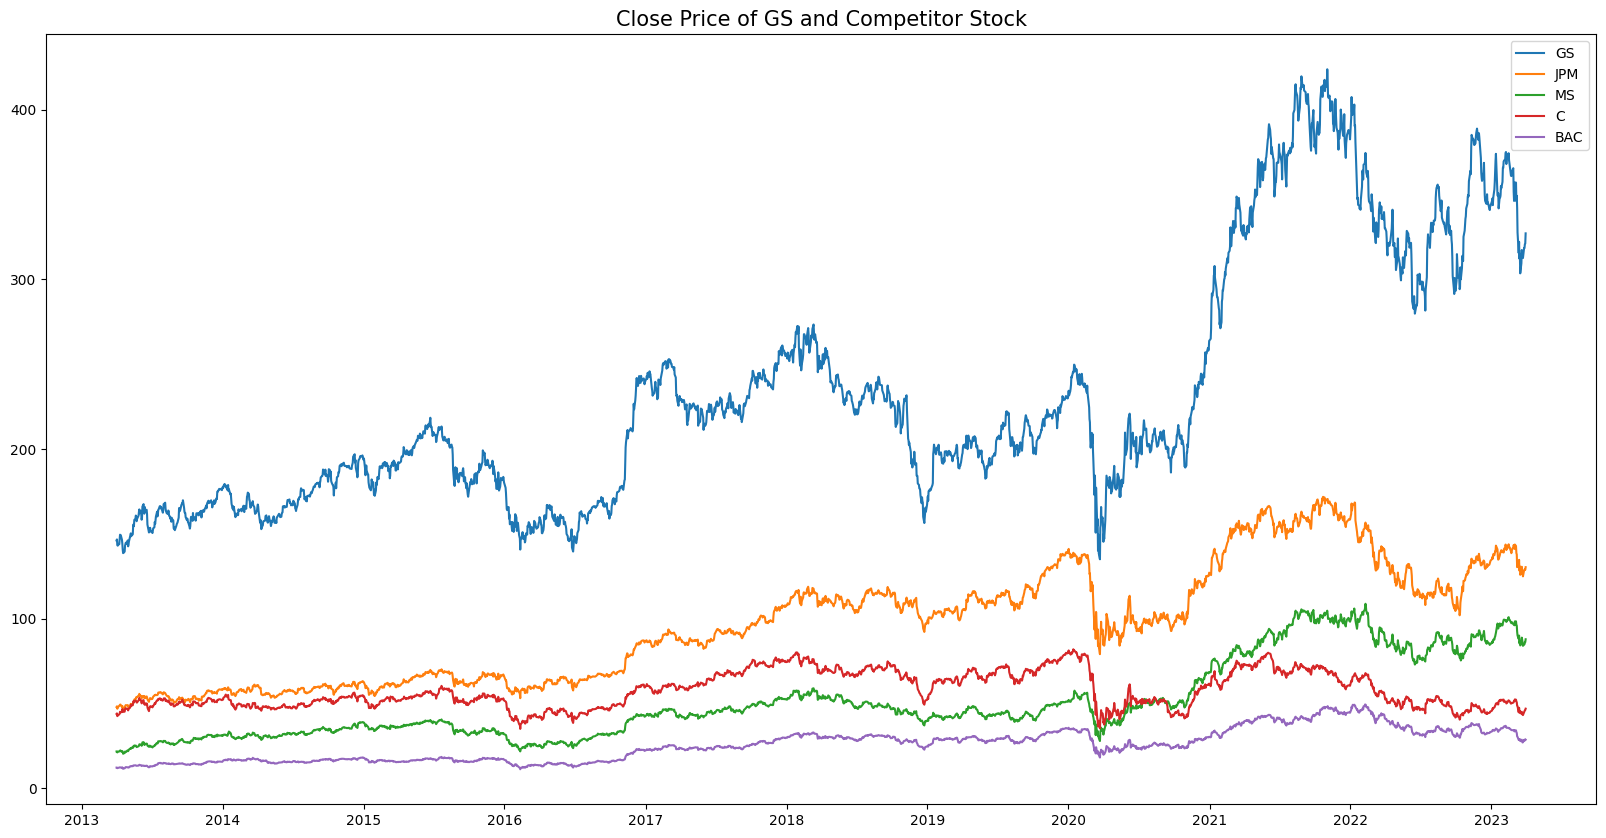

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(gs['Close'])
plt.plot(jpm['Close'])
plt.plot(ms['Close'])
plt.plot(c['Close'])
plt.plot(bac['Close'])
plt.legend(['GS', 'JPM', 'MS','C','BAC'])
plt.title('Close Price of GS and Competitor Stock', fontsize = 15)

##Percentage change in stock price

Text(0.5, 1.0, 'Percentage change in stock price')

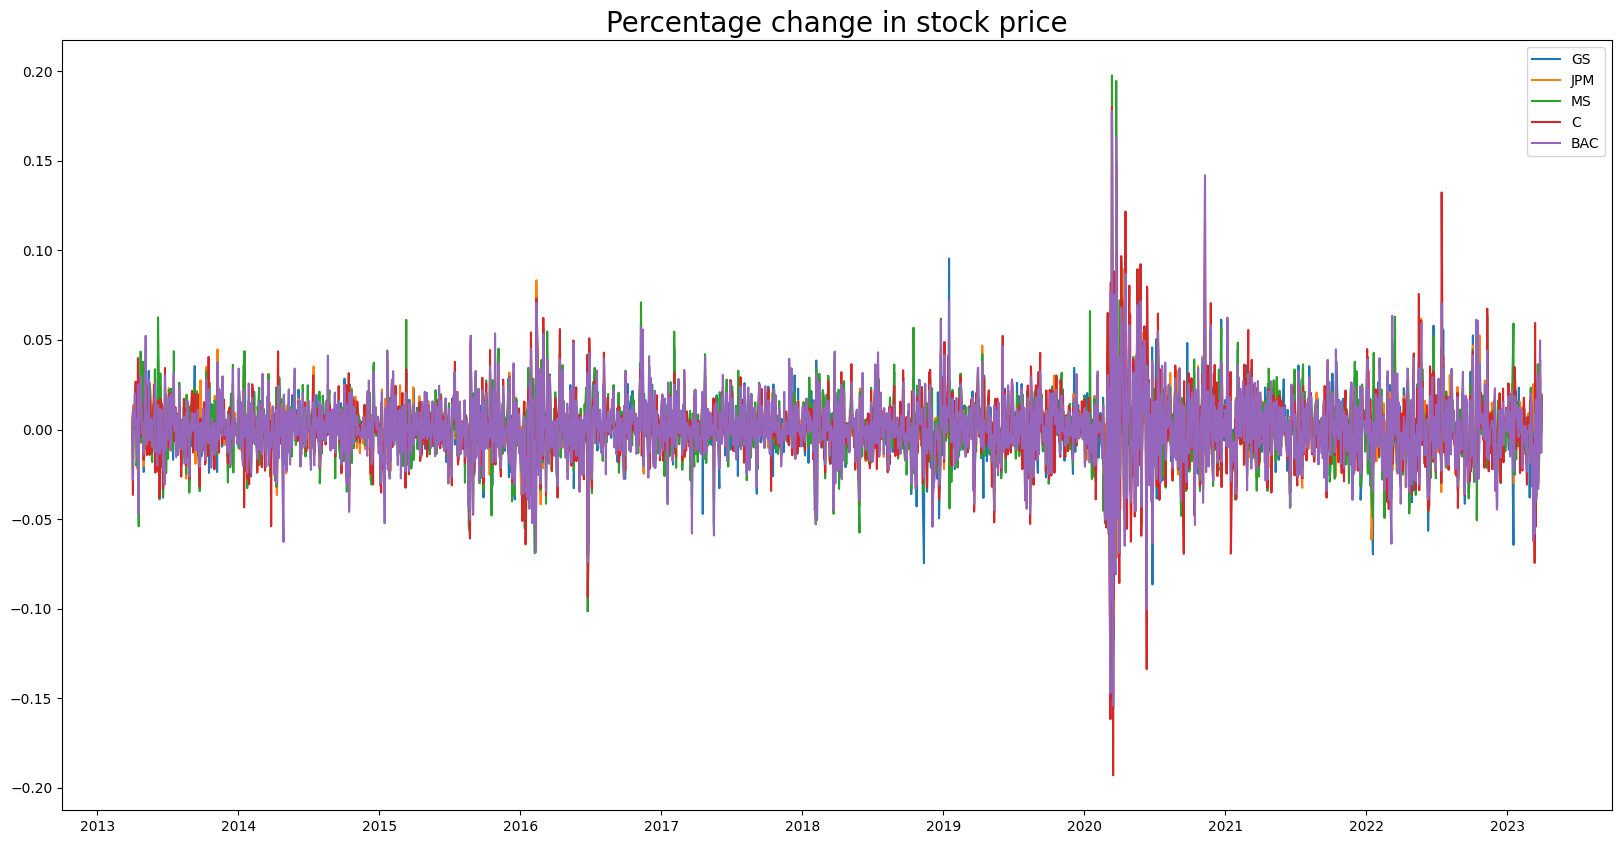

In [19]:
gs['pct_change'] = gs['Close'].pct_change()
jpm['pct_change'] = jpm['Close'].pct_change()
ms['pct_change'] = ms['Close'].pct_change()
c['pct_change'] = c['Close'].pct_change()
bac['pct_change'] = bac['Close'].pct_change()

plt.figure(figsize = (20,10))
plt.plot(gs['pct_change'])
plt.plot(jpm['pct_change'])
plt.plot(ms['pct_change'])
plt.plot(c['pct_change'])
plt.plot(bac['pct_change'])
plt.legend(['GS', 'JPM', 'MS','C','BAC'])
plt.title('Percentage change in stock price', fontsize = 20)

##GS and Competitor Stock Vol Traded

Text(0.5, 1.0, 'GS and Competitor Stock Vol Traded')

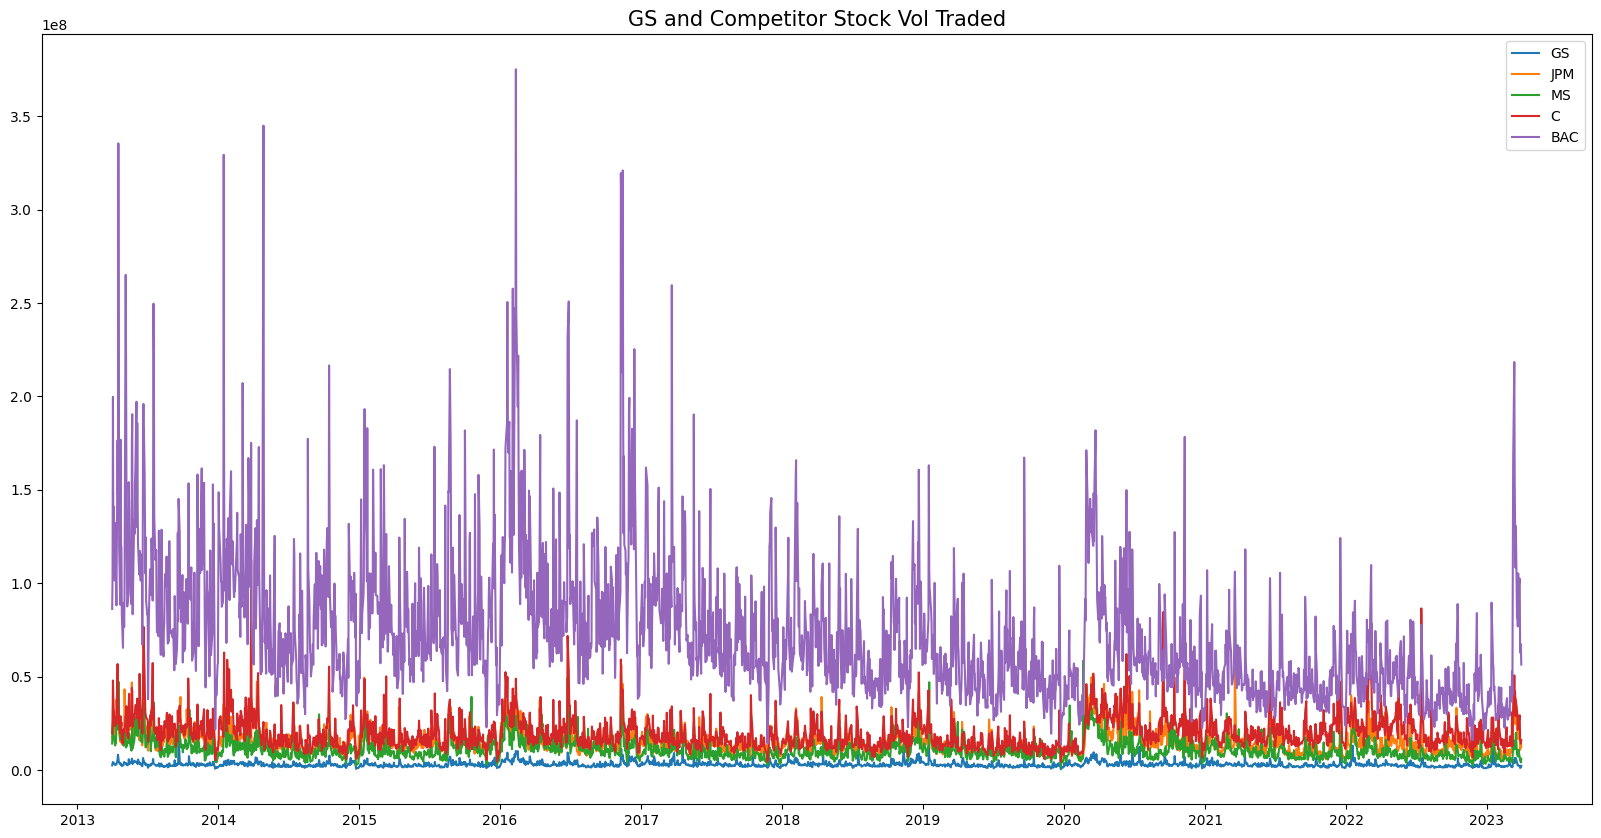

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(gs['Volume'])
plt.plot(jpm['Volume'])
plt.plot(ms['Volume'])
plt.plot(c['Volume'])
plt.plot(bac['Volume'])
plt.legend(['GS', 'JPM', 'MS','C','BAC'])
plt.title('GS and Competitor Stock Vol Traded', fontsize = 15)

## CORRELATION AMONG GS AND COMPETITORS

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


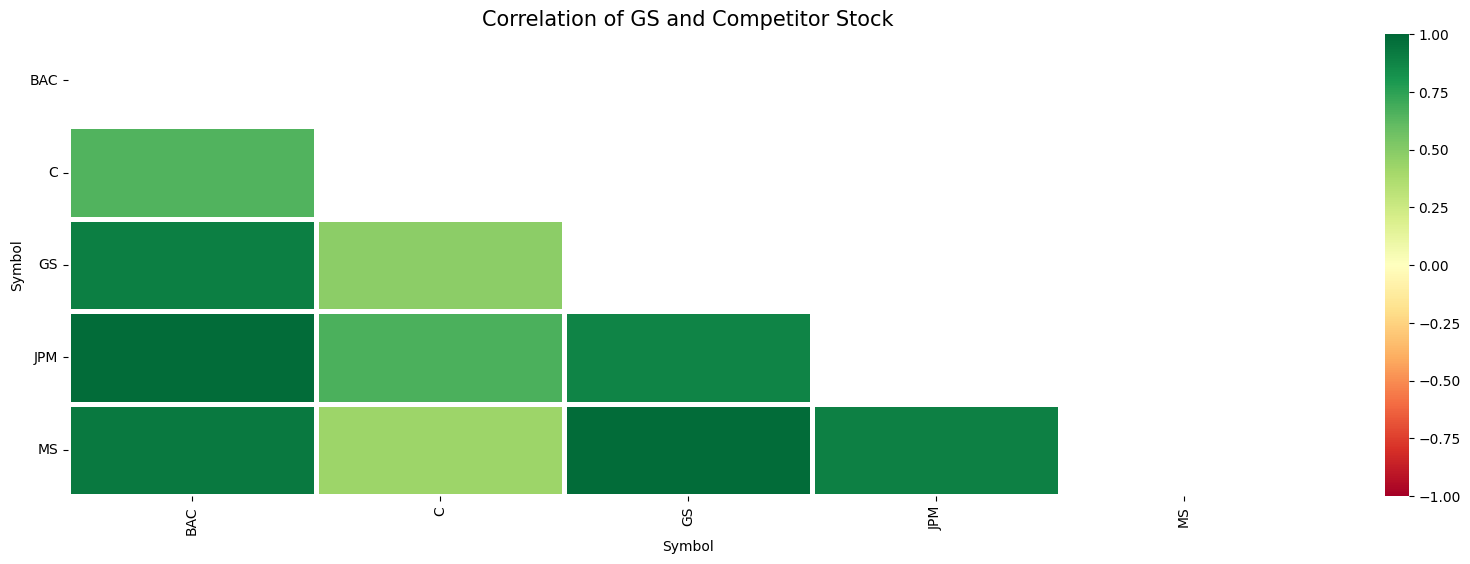

In [20]:
import numpy as np
start = '2013-01-01'
end_date = '2023-01-01'
symbols_list = ['GS', 'JPM', 'MS', 'C', 'BAC']
symbols = []

#pull price using yfinance for each symbol in list defined above
for ticker in symbols_list:
    r = yf.download(ticker, start=start, end=end_date)
    # add a symbol column
    r['Symbol'] = ticker
    symbols.append(r)

# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df_pivot = df.pivot('Date','Symbol','Close').reset_index()

corr_df = df_pivot.corr(method='pearson')
corr_df.head().reset_index()
corr_df.head(10)

mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
#generate plot
sns.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Correlation of GS and Competitor Stock', fontsize = 15)
plt.show()

## STOCK RETURNS COMPARISON GS AND COMPETITORS

[*********************100%***********************]  5 of 5 completed


<Figure size 1600x1000 with 0 Axes>

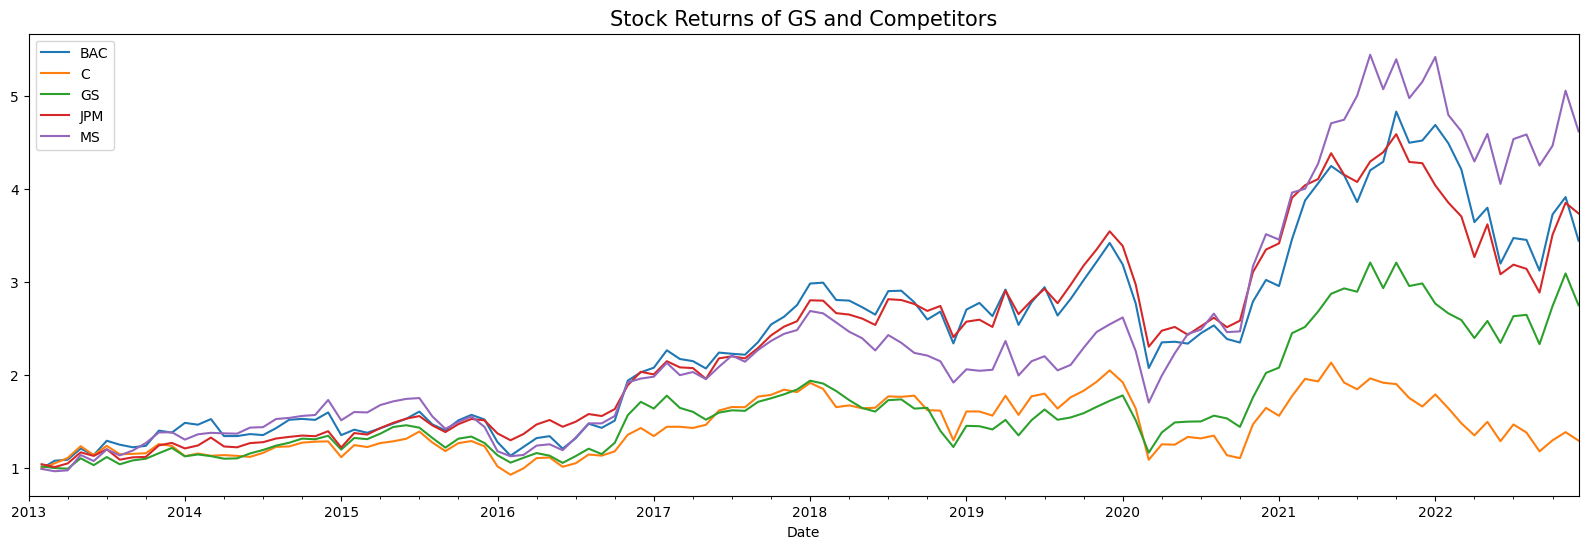

In [21]:
tickers = ["GS", "JPM", "MS", "C","BAC"]
multpl_stocks = yf.download(tickers,
start = "2013-01-01",
end = "2023-01-01")["Adj Close"]

multpl_stock_daily_returns = multpl_stocks.pct_change()
multpl_stock_monthly_returns = multpl_stocks.resample('M').ffill().pct_change()

fig = plt.figure(figsize = (16,10))
(multpl_stock_monthly_returns + 1).cumprod().plot()
plt.title('Stock Returns of GS and Competitors', fontsize = 15)
plt.show()

## Kernel Density of GS and Competitors

[*********************100%***********************]  5 of 5 completed
         Mean  Standard Deviation  Skewness   Kurtosis
BAC  0.000594            0.019390  0.258026  10.287343
C    0.000313            0.020360 -0.011032  13.352596
GS   0.000545            0.017687  0.088894  10.190232
JPM  0.000653            0.017001  0.303118  13.787953
MS   0.000835            0.019572  0.365839  12.424492


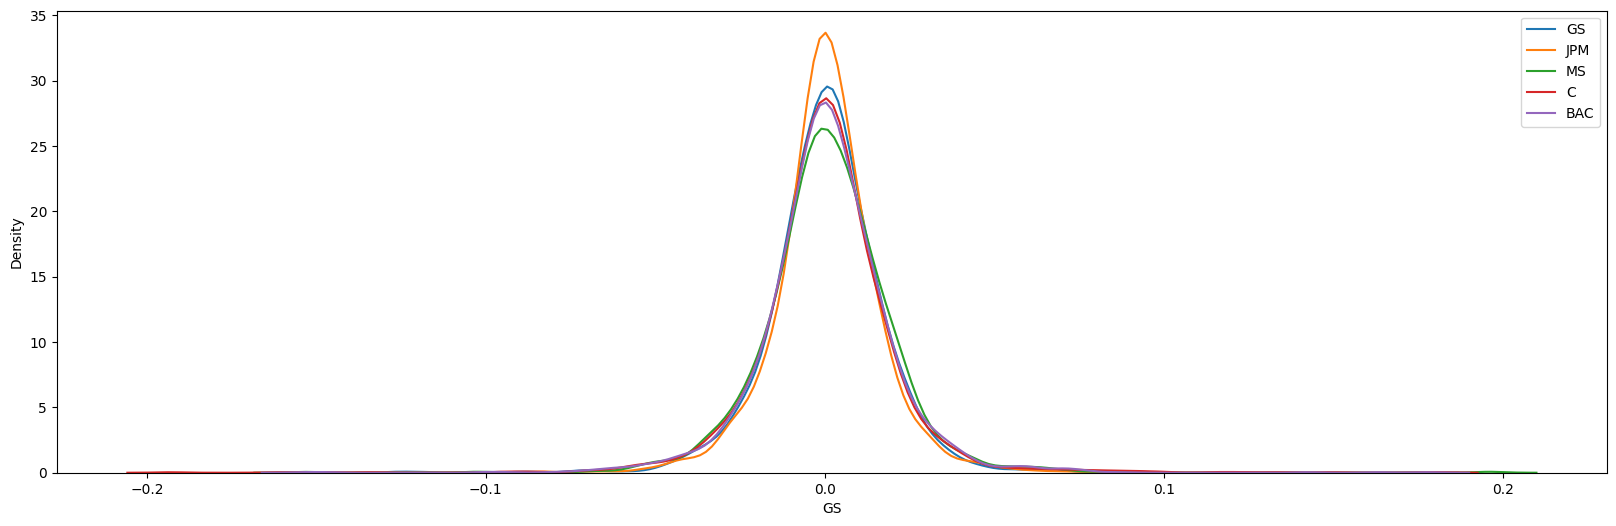

In [15]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the tickers of the stocks to analyze
tickers = ['GS','JPM', 'MS', 'C', 'BAC']

# Set the start and end dates for the training period
start_date = '2013-04-01'
end_date = '2023-04-01'

# Download the historical prices for each stock
prices = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Compute the daily returns for each stock
returns = prices.pct_change().dropna()

# Compute the summary statistics for each stock
summary_stats = pd.concat([returns.mean(), returns.std(), returns.skew(), returns.kurtosis()], axis=1)
summary_stats.columns = ['Mean', 'Standard Deviation', 'Skewness', 'Kurtosis']
print(summary_stats)

# Plot the kernel density for each stock
plt.rcParams['figure.figsize'] = (20,6)

sns.kdeplot(returns['GS'], label='GS')
sns.kdeplot(returns['JPM'], label='JPM')
sns.kdeplot(returns['MS'], label='MS')
sns.kdeplot(returns['C'], label='C')
sns.kdeplot(returns['BAC'], label='BAC')

plt.legend()
